#### Reinforcement Learning:
# Multi-Armed Bandits
### An Upper Confidence Bound Solution

The Multi-Armed Bandid Problem can be described thus: Given N choices of actions to take, each with a distinct (and unknown) probability P of generating a reward, devise a strategy to test each choice so that final, cumulative reward is maximized. This has many concrete applications in the real world: Which path to take in a maze, where/when to move troops in battle, which restaurant to choose when navigating an unknown neighborhood for dinner, how best to allocate funds to research teams working on unproven/risky projects, etc... Anywhere where there is a tradeoff between risk and exploration, there exists some Doc-Octopusesque Thief presenting some variation of this conundrum.

Herein, I implement a solution to the Multi-Armed Bandit problem following the Upper Confidence Bound method.

Side note: 
_For more on solutions to the Multi-Armed Bandit problem, please see Lilian Weng's fantastic article ["The Multi-Armed Bandit Problem and Its Solutions"](https://lilianweng.github.io/lil-log/2018/01/23/the-multi-armed-bandit-problem-and-its-solutions.html)_


In [128]:
%pylab inline
%reload_ext autoreload
%autoreload 2

import pandas as pd
from bandit_utils import *

Populating the interactive namespace from numpy and matplotlib


#### Bandit Class
A Bandit is a simple object with some probability of producing a reward. </br>
This probability is randomly chosen by default, but can be set for demonstration purposes.</br>
Let's look at a couple:

In [129]:
n_bandits = 5
probs = (np.arange(1,n_bandits+1)/(n_bandits))-.1
bandits = [Bandit(p=p, r=1) for p in probs]
bandits

[B: 0.1%, B: 0.3%, B: 0.5%, B: 0.7%, B: 0.9%]

These Bandits can be pinged for a reward, granted according to their internal reward probability:

In [130]:
print('Low probability bandit reward chain:')
b_low_prob = bandits[0]
print([b_low_prob.get_reward() for _ in range(10)])
print()

print('High probability bandit reward chain:')
b_high_prob = bandits[3]
print([b_high_prob.get_reward() for _ in range(10)])

Low probability bandit reward chain:
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

High probability bandit reward chain:
[0, 1, 0, 1, 0, 1, 1, 1, 1, 1]


#### UCBAgent Class
The UCBAgent class takes an array of bandits, and pings them according to their expected probability of reward, modulated by an exploration factor. The resulting reward is tracked in a history dictionary, which is used to update the expected probability for each bandit at every time step.

In [131]:
g = UCBAgent(bandits)
n_steps = 100
g.run(n_steps)

You can see that, even after only 100 iterations, the Agent has learned to pull the higher probability arms more often.

In [132]:
g.bandit_history

{0: array([1., 0., 0., 0., 0., 0., 0.]),
 1: array([0., 0., 0., 1., 0., 1., 0., 0.]),
 2: array([0., 0., 1., 1., 1., 0., 0., 0., 0.]),
 3: array([0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 1., 0., 0.]),
 4: array([1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 1., 1.])}

With more iterations, the Agent gets closer and closer to knowing the true probability of each arm:

In [133]:
g = UCBAgent(bandits)
n_steps = 100
for s in range(n_steps):
    if (s)%20==0:
        print(f'Expectation at {s} iterations:')
        print('(Expectation | Ground Truth)')
        for i,b in g.bandits.items():
            print(np.round(g.expectation[i],2), '|', b.p)
        print()
    g.run(i)

Expectation at 0 iterations:
(Expectation | Ground Truth)
1 | 0.1
1 | 0.3
1 | 0.5
1 | 0.7
1 | 0.9

Expectation at 20 iterations:
(Expectation | Ground Truth)
0.33 | 0.1
0.17 | 0.3
0.17 | 0.5
0.8 | 0.7
0.92 | 0.9

Expectation at 40 iterations:
(Expectation | Ground Truth)
0.31 | 0.1
0.36 | 0.3
0.5 | 0.5
0.72 | 0.7
0.87 | 0.9

Expectation at 60 iterations:
(Expectation | Ground Truth)
0.27 | 0.1
0.39 | 0.3
0.48 | 0.5
0.69 | 0.7
0.89 | 0.9

Expectation at 80 iterations:
(Expectation | Ground Truth)
0.25 | 0.1
0.35 | 0.3
0.46 | 0.5
0.66 | 0.7
0.89 | 0.9



#### Performance
As the UCBAgent's internal representation of the bandits evolves, it's average reward improves asymptotically toward the probabiliy of the best bandit (here, .9):

Text(0, 0.5, 'Average Expected Reward')

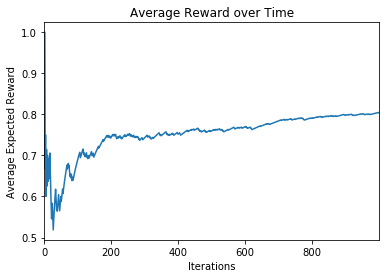

In [134]:
g = UCBAgent(bandits)
n_steps = 1000
g.run(n_steps)
v = pd.Series(g.reward_history).cumsum()/pd.Series(range(n_steps)).iloc[1:]
v.plot()
plt.title('Average Reward over Time')
plt.xlabel('Iterations')
plt.ylabel('Average Expected Reward')

#### How does this compare?

A random agent acting on this distribution of Bandits would expect an average reward of:

In [135]:
r_rwd = np.average([b.p for b in bandits])
print(r_rwd)

0.5


The UCBAgent Model overtakes this almost immediately!

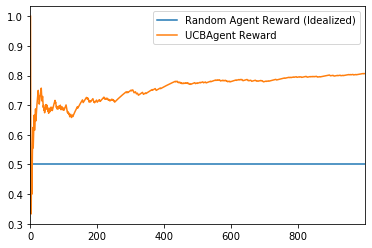

In [127]:
r_rwd = np.average([b.p for b in bandits])
pd.Series([r_rwd]*n_steps).plot()
v.plot()
plt.legend(['Random Agent Reward (Idealized)', 'UCBAgent Reward'])